# MALL CUSTOMER SEGMENTATION PROJECT

# INTRODUCTION

Customer segmentation is a method of analysing a client base and grouping customers into categories or segments which share particular attributes. Key differentials in segmentation include age, gender, education, location, spending patterns and socio-economic group. Relevant differentials are those which are expected to influence customer behaviour in relation to a business. The selected criteria are used to create customer segments with similar values, needs and wants.

# Objective

The objective of this analysis is to uncover underlying patterns in the customer base, and to groups of customers accordingly, often known as market segmentation. In doing so, the marketing team can have a more targeted approach to reach consumers, and the mall can make more informed strategic decisions to increase profits.

# Dataset description

The dataset is a customer database of a mall. It contains 200 observations with basic information such as age, gender, annual income, and spending score.

Following is the Data Dictionary for customer dataset :-

CustomerID : Unique ID assigned to the customer

Gender :Gender of the customer

Age : Age of the customer

Annual Income (k$) : Annual Income of the customee

Spending Score : Score assigned by the mall based on customer behavior and spending nature

# Data Preparation

As a first step, I will load all the necessary modules that will be used in this notebook.

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

# Load Dataset

Then I will load the dataset to be used in this exercise. I will also get more information about the data i am working with.

In [94]:
df = pd.read_csv('C:/Users/emeka/DATASETS/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [95]:
#get the data types for each feature/column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [96]:
#we have no missing data in the dataset. so we can drop the customer ID column as it each row is unique
df.drop('CustomerID', inplace = True, axis =1)

#get the descriptive statistics of the dataset
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


# Exploratory Data Analysis

I will visualize the distribution of the numerical columns

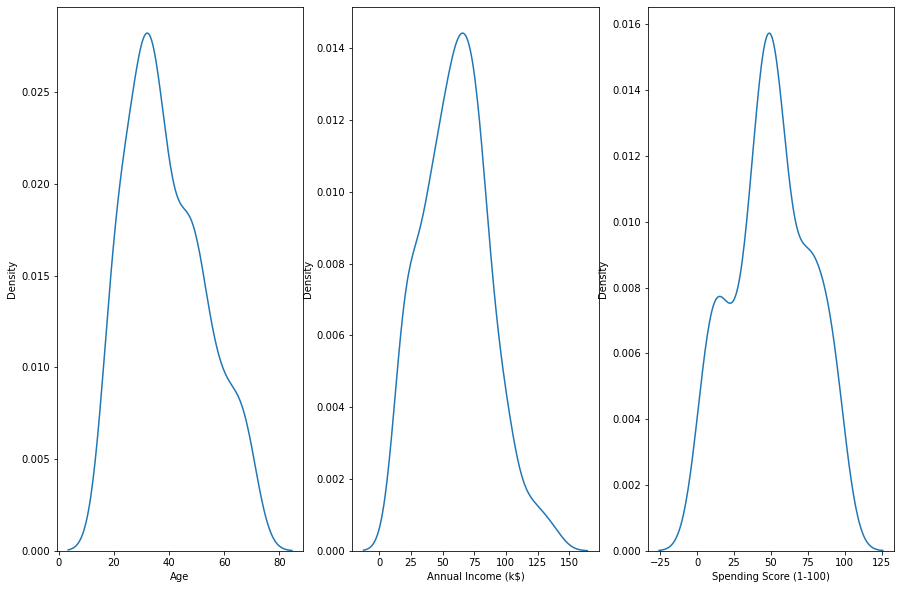

In [97]:
fig, axes = plt.subplots(1, 3, figsize=(15, 10))
sns.kdeplot(ax=axes[0], data = df, x = 'Age')
sns.kdeplot(ax=axes[1], data = df, x = 'Annual Income (k$)')
sns.kdeplot(ax=axes[2], data = df, x = 'Spending Score (1-100)')
plt.show()

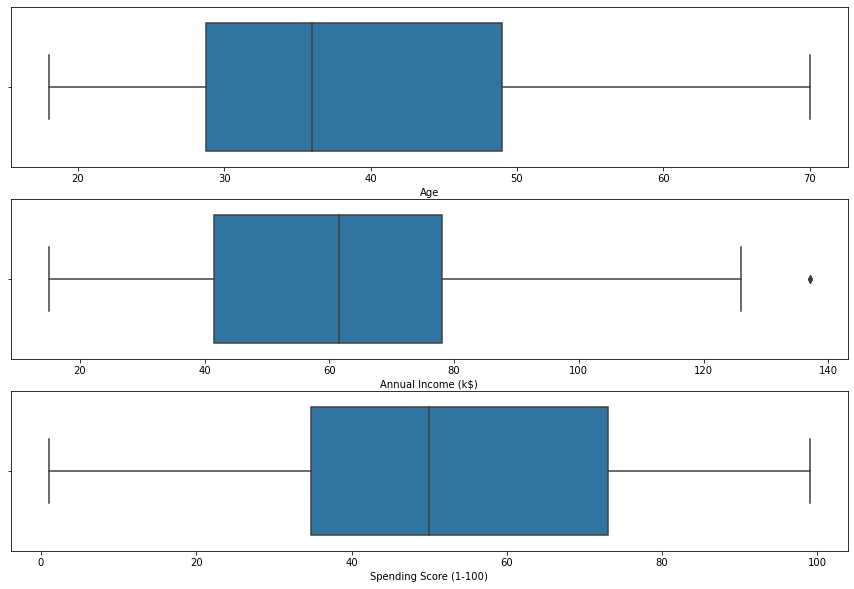

In [98]:
fig, axes = plt.subplots(3, 1, figsize=(15, 10))
sns.boxplot(ax=axes[0], data = df, x = 'Age')
sns.boxplot(ax=axes[1], data = df, x = 'Annual Income (k$)')
sns.boxplot(ax=axes[2], data = df, x = 'Spending Score (1-100)')
plt.show()

In [99]:
#check the outlier

df[df['Annual Income (k$)'] >= 130]

,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,Male,32,137,18
199,Male,30,137,83


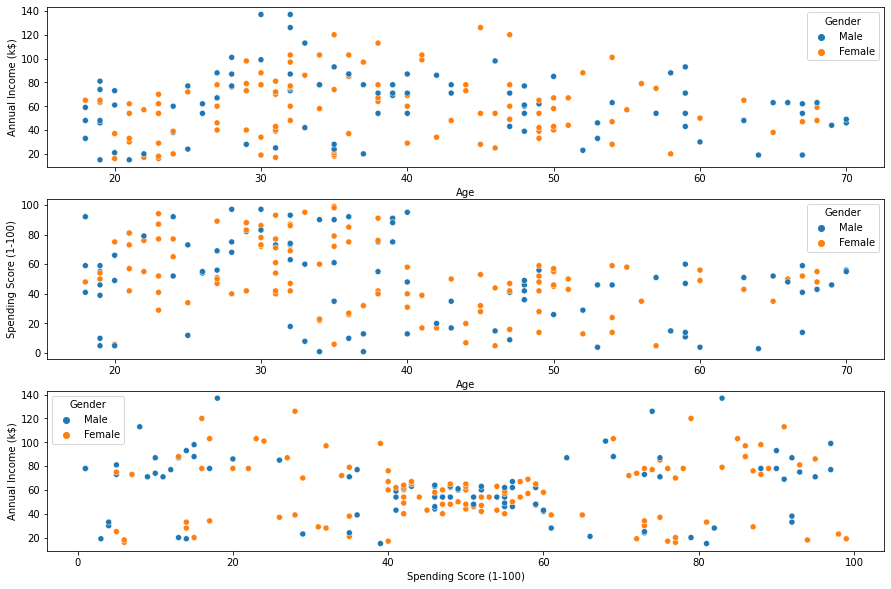

In [100]:
#create a scatterplot to visualize the relationship between Gender and the various numerical columns

fig, axes = plt.subplots(3, 1, figsize=(15, 10))
sns.scatterplot(x = 'Age', y = 'Annual Income (k$)', hue = 'Gender', ax=axes[0], data = df)
sns.scatterplot(x = 'Age', y='Spending Score (1-100)', hue ='Gender', ax=axes[1], data = df)
sns.scatterplot(x = 'Spending Score (1-100)', y = 'Annual Income (k$)', hue = 'Gender', ax=axes[2], data = df)
plt.show()

# Takeaways from EDA

Age and Spending Score

The inverse relationship is fairly clear. Interestingly, all of the highest spending individuals are between the ages 20 and 40. The decline in spending seems to drop off sharply for customers who are 40 years old, at which point the spending score seems to level off. Interestingly, almost all individuals over 65 years old are moderate spenders, and this is an insight that could not be communicated through simple correlation between the two variables. This age group is likely made up of grandparents who are shopping for their young kids.

Income and Spending Score

It is difficult to identify a clear relationship between income and spending score, however, clusters do appear to form within the data. It is difficult to interpret the relationship btween gender and spending score with this plot

# Feature Engineering

In [101]:
#Encode categorical variables
df = pd.get_dummies(df, columns = ['Gender'])

In [103]:
#I will select two columns as features
X = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values


# Model Building

Kmeans Clustering will be used in building this model


# Hyper parameter tuning

To find the best K value, I will use the elbow method. The elbow method finds the value of the optimal number of clusters using the total within-cluster sum of square values.

In [104]:
#For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). 
# WCSS is the sum of squared distance between each point and the centroid in a cluster.

#i will assume a range of 1-10 for testing
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) #model fitting - grouping to be done based on X(annual income & spending score)
    wcss.append(kmeans.inertia_) #find the wcss(inertia) for all k (1 - 11)

C:\Users\emeka\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


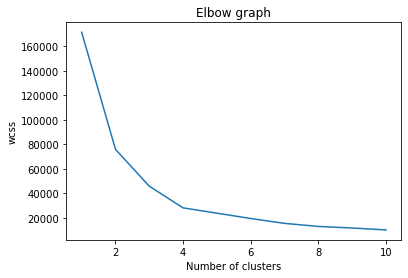

In [105]:
#plot an elbow graph to determine the number of clusters
plt.plot(range(1,11), wcss)
plt.title('Elbow graph')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

# K-Means Clustering 

In [106]:
#as we can see here, the number of clusters is 4
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)


# Cluster Visualization

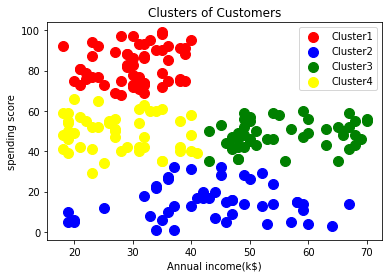

In [107]:
# PLotting the clusters
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], s = 100, c = 'red', label = 'Cluster1')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], s = 100, c = 'blue', label = 'Cluster2')
plt.scatter(X[Y == 2, 0], X[Y == 2, 1], s = 100, c = 'green', label = 'Cluster3')
plt.scatter(X[Y == 3, 0], X[Y == 3, 1], s = 100, c = 'yellow', label = 'Cluster4')

plt.title('Clusters of Customers')
plt.xlabel('Annual income(k$)')
plt.ylabel('spending score')
plt.legend()
plt.show()

# Recommendation

The third cluster consists of shoppers who have moderate levels of income and spending score. This cluster consists of people who can likely transition into more loyal customers given they are already frequent visitors who have a reasonable level of disposable income. In-store promotions and a revamped loyalty program could incentivize this group to become higher spenders. 

The first cluster presents another interesting opportunity.  this cluster represents high income, but low spending score individuals. This group certainly has the financial means to spend more within the mall, however, they likely consume through other channels (other store outlets, online shopping), so more effort needs to be put towards getting them into the mall. Enhancing the in-store experience should help create a more viable alternative to their current purchasing outlets. Stores with customer journeys that cannot be easily replicated online should take full advantage (such as fitting clothes in person, in-person demonstrations of technology, etc.) Additionally, implementing click and collect and other features to expedite the ordering process can provide the convenience that this segment seeks.

The fourth cluster consist of lower income individuals, and though this cluster has a considerable spending score, these customers will have a tough time spending more money than they are already, so these groups are lower priority segments.

The second is already the most loyal. Prioritizing this group might seem enticing, and may reap rewards, but given that this segment is already extremely loyal, targeting this group doesn't seem necessary to drive purchases. The resources can be better spent elsewhere to move the needle on customers who have the financial means to purchase more than they currently are, but who also need to be enticed with an additional value proposition.
